# DAT200 CA5 2023

Kaggle username: andrinezimmermann

### Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, accuracy_score

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings

def remove_warnings(*args, **kwargs):
    pass
warnings.remove_warnings = remove_warnings

### Reading data

In [2]:
# Loading the train and test dataset
train_df = pd.read_csv('./data/train.csv', sep=',', index_col=0)
test_df = pd.read_csv('./data/test.csv', sep=',', index_col=0)

train_df.shape

(618, 14)

### Data exploration and visualisation

In [3]:
# Descriptive stats
describe_stats = train_df.describe()
describe_stats

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Fibre density,Protein density,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids,Scoville score
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,6.180000e+02
mean,146.695793,2.699191,50.893689,79.365534,29.245146,6.461974,32.309061,28.453722,15.486359,0.974547,16.798883,1.527443,0.659660,2.180537e+06
std,73.834312,1.980640,63.439770,4.041304,6.812141,1.097615,14.251957,26.017481,10.894662,0.081469,5.762834,1.927231,0.923704,1.059004e+06
min,21.300000,1.000000,0.000000,67.400000,22.400000,4.000000,1.000000,9.400000,0.100000,0.910000,7.110000,0.000000,0.000000,2.210000e+02
25%,83.450000,1.000000,0.000000,76.395000,22.400000,5.900000,24.000000,14.800000,7.315000,0.920000,11.760000,0.402500,0.150000,1.410124e+06
50%,141.800000,1.500000,0.000000,79.960000,29.400000,6.400000,34.000000,20.700000,13.420000,0.950000,16.475000,0.850000,0.325000,2.136358e+06
75%,200.600000,4.375000,115.900000,81.190000,34.000000,7.375000,41.000000,32.400000,21.135000,0.990000,21.887500,1.840000,0.710000,2.842361e+06
max,322.600000,9.000000,195.000000,91.980000,59.800000,8.900000,72.000000,161.700000,65.200000,1.490000,26.990000,14.800000,7.200000,5.041621e+06


In [4]:
# Checking for any missing values
nan = train_df.isna().sum()
print(nan)

Capsaicin level                0
Pungent odor                   0
Vitamin C                      0
Water                          0
Light transmittance            0
Temp storage                   0
Time storage                   0
Dihydrocapsaicin level         0
Fibre density                  0
Protein density                0
Saturated fatty acids          0
Monounsaturated fatty acids    0
Polyunsaturated fatty acids    0
Scoville score                 0
dtype: int64


There are no missing values in the dataset. 

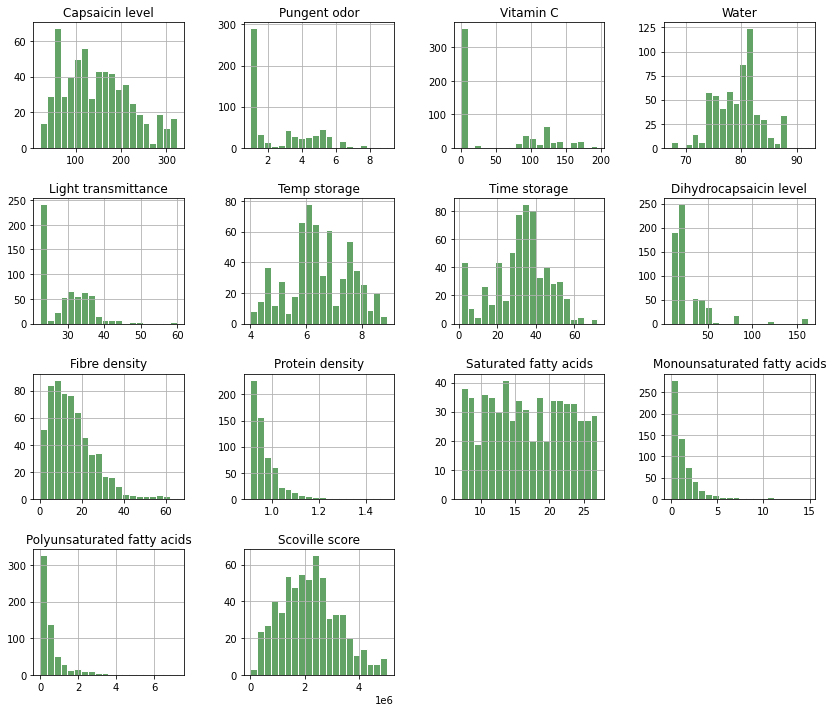

In [5]:
# Histogram for each feature
train_df.hist(bins=20, figsize=(14,12), color='#63a466', edgecolor='white')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Many of the features resemble a normal distribution, such as Water, Time storage and Scoville score. We can also see that many of the features are left-skewed; Light transmittance, Dihydrocapaicin level, Fibre Density, Protein density, Monounsaturated fatty acids and Polyunsaturated fatty acids. 

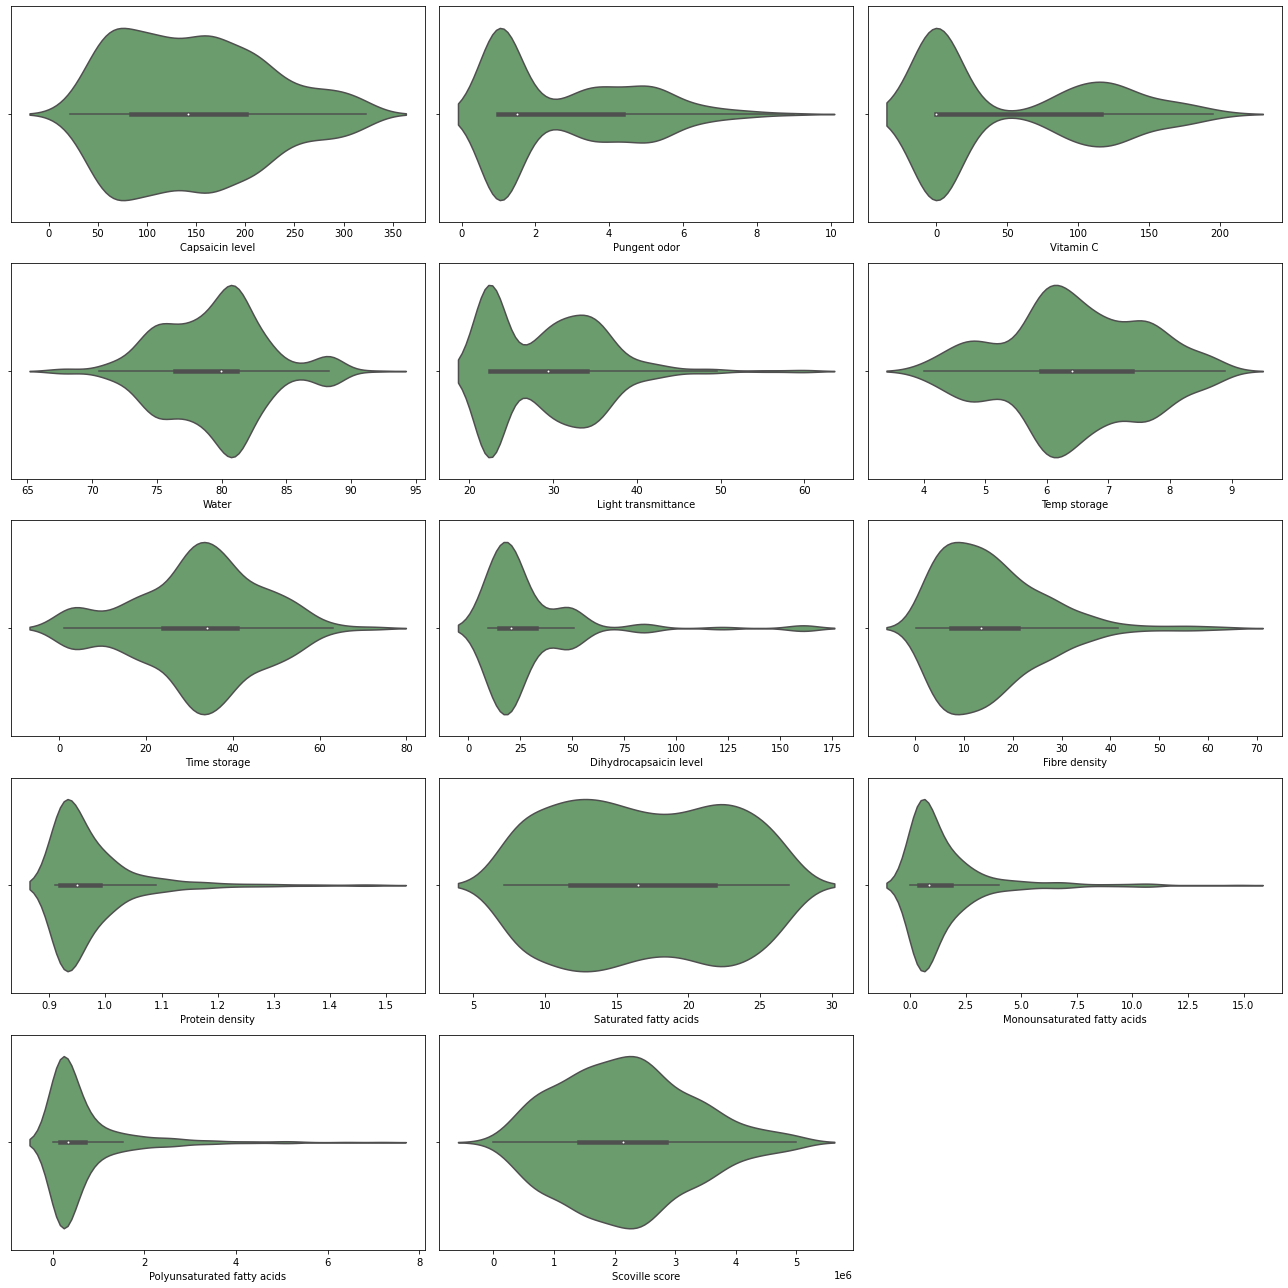

In [6]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 18))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create a violin plot for each feature
for i, col in enumerate(train_df.columns):
    sns.violinplot(x=col, data=train_df, ax=axes[i], color="#63a466")

# Remove any unused axes
for ax in axes[len(train_df.columns):]:
    ax.remove()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

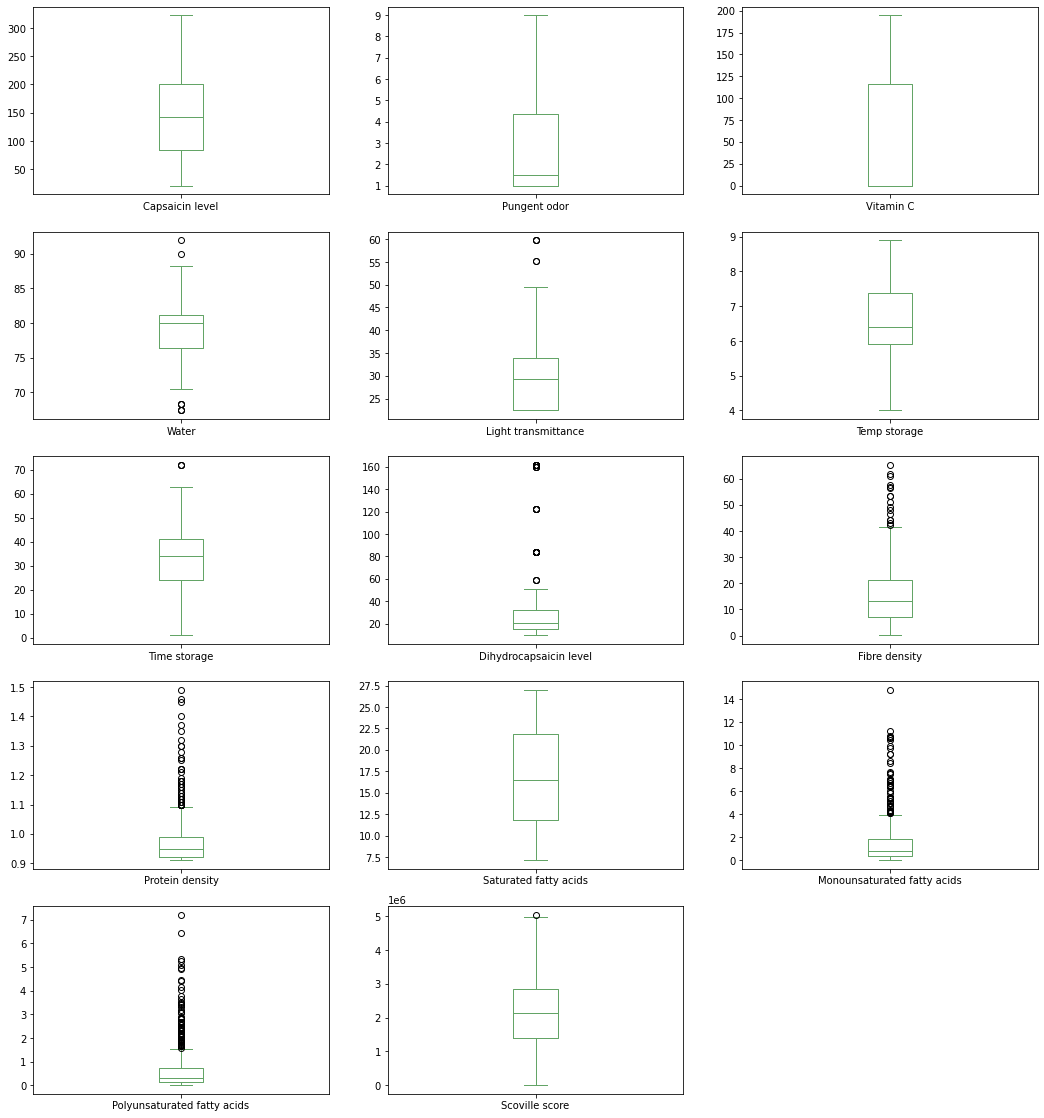

In [7]:
# Boxplots for all features
train_df.plot.box(subplots=True, figsize=(18,20), layout=(5, 3), sharex=False, sharey=False, color='#63a466')
plt.show()

Based on the visualization, we can see that there many features with outliers; Fibre density, Protein density, Monounsaturated fatty acids and Polysaturated fatty acids.

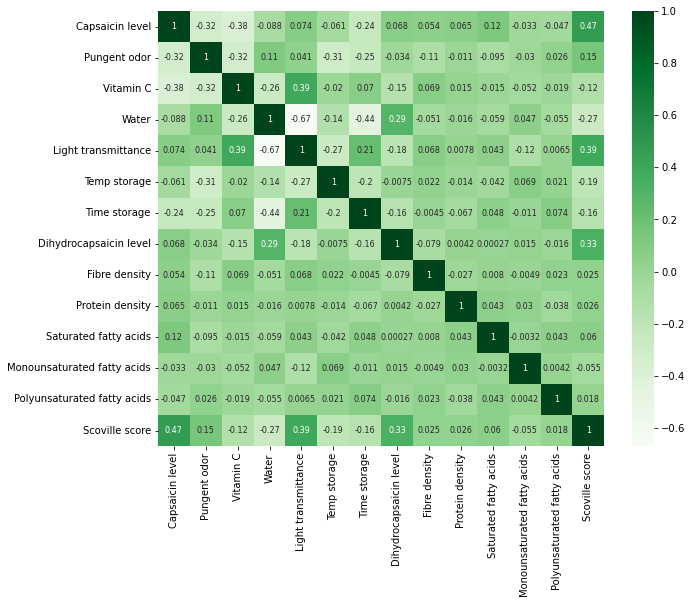

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot = True, annot_kws={'size':8}, cmap='Greens')
plt.show()

By the correlation matrix, we can see that the features Fibre density, Protein density, Saturated fatty acids, Monounsaturated fatty acids and Polysaturated fatty acids seem less important than the rest. 

### Data cleaning

In [9]:
# Removing outliers using z-score with threshold 3  
df = train_df.copy()
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df_clean.shape

(538, 14)

The dataset went from 618 rows to 538 rows. But I did not use this in my final submission, and kept the outliers in the dataset. Instead I chose to remove the features that seemed less important based on the correlation matix. 

In [10]:
df_reduce = train_df.copy()

df_reduce = df_reduce.drop(columns=['Fibre density', 'Protein density', 'Saturated fatty acids',
                                    'Monounsaturated fatty acids','Polyunsaturated fatty acids'])

In [11]:
df_reduce.shape

(618, 9)

#### Doing the same on test set

In [12]:
test_reduce = test_df.copy()

test_reduce = test_reduce.drop(columns=['Fibre density', 'Protein density', 'Saturated fatty acids',
                                        'Monounsaturated fatty acids','Polyunsaturated fatty acids'])

In [13]:
test_reduce.shape

(412, 8)

### Data exploration after cleaning

In [14]:
# Descriptive stats
describe_stats = df_reduce.describe()
describe_stats

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Scoville score
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,6.180000e+02
mean,146.695793,2.699191,50.893689,79.365534,29.245146,6.461974,32.309061,28.453722,2.180537e+06
std,73.834312,1.980640,63.439770,4.041304,6.812141,1.097615,14.251957,26.017481,1.059004e+06
min,21.300000,1.000000,0.000000,67.400000,22.400000,4.000000,1.000000,9.400000,2.210000e+02
25%,83.450000,1.000000,0.000000,76.395000,22.400000,5.900000,24.000000,14.800000,1.410124e+06
50%,141.800000,1.500000,0.000000,79.960000,29.400000,6.400000,34.000000,20.700000,2.136358e+06
75%,200.600000,4.375000,115.900000,81.190000,34.000000,7.375000,41.000000,32.400000,2.842361e+06
max,322.600000,9.000000,195.000000,91.980000,59.800000,8.900000,72.000000,161.700000,5.041621e+06


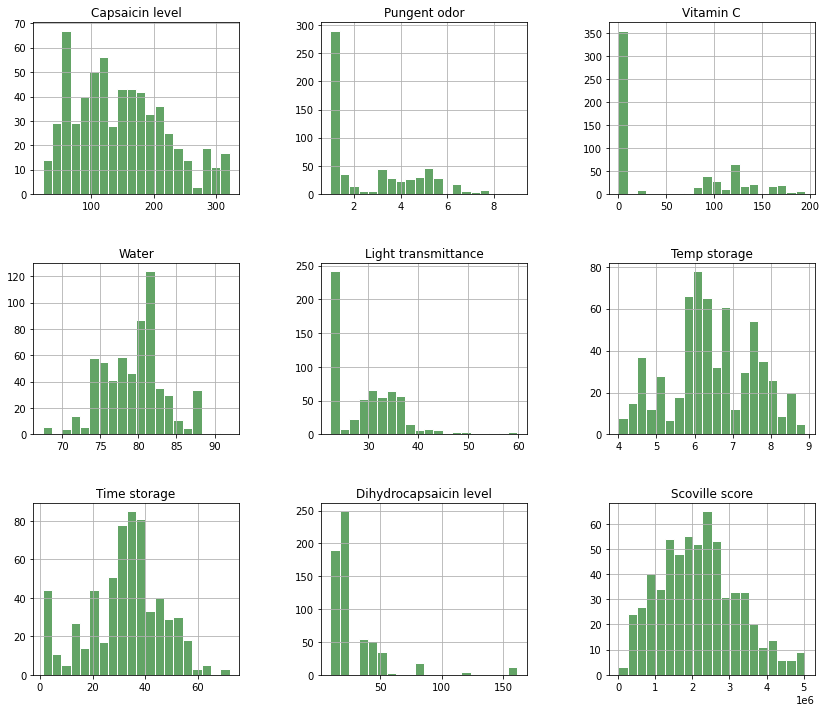

In [15]:
# Histogram for each feature
df_reduce.hist(bins=20, figsize=(14,12), color='#63a466', edgecolor='white')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

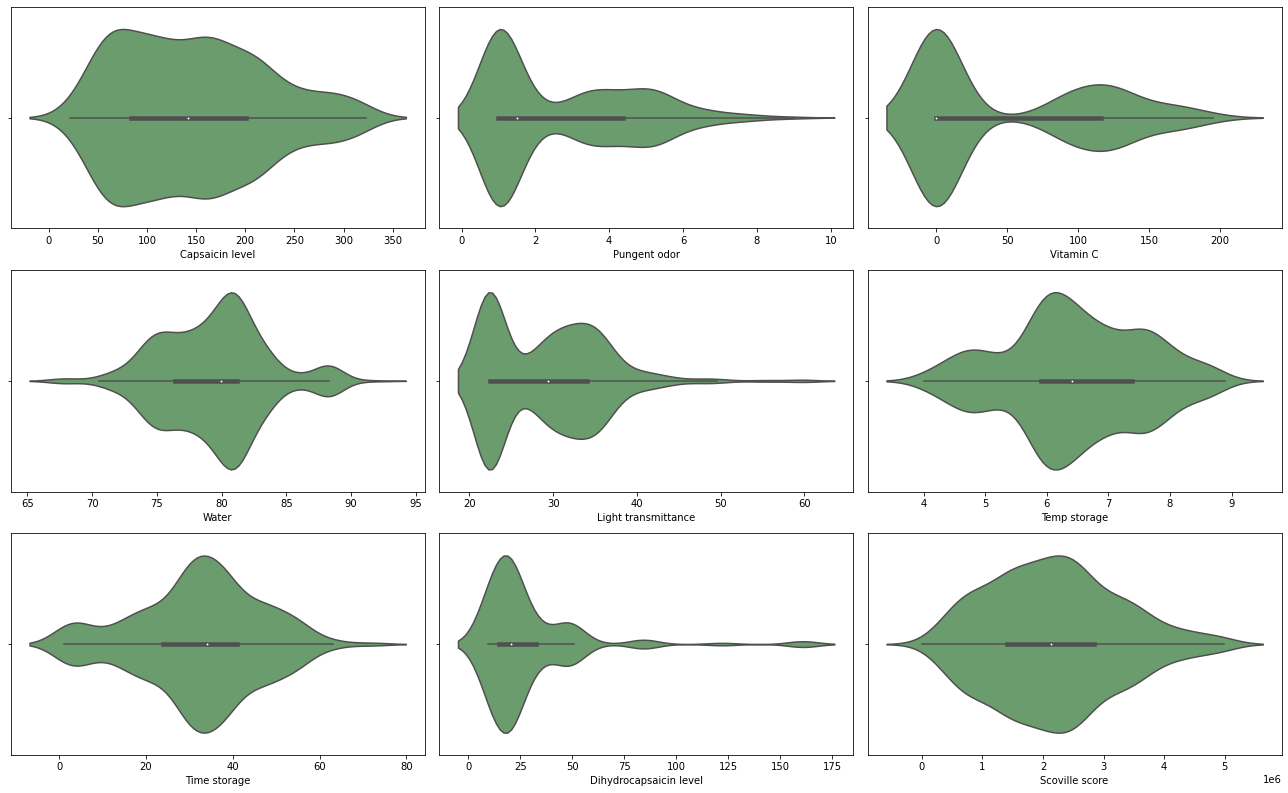

In [16]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 18))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create a violin plot for each feature
for i, col in enumerate(df_reduce.columns):
    sns.violinplot(x=col, data=df_reduce, ax=axes[i], color="#63a466")

# Remove any unused axes
for ax in axes[len(df_reduce.columns):]:
    ax.remove()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

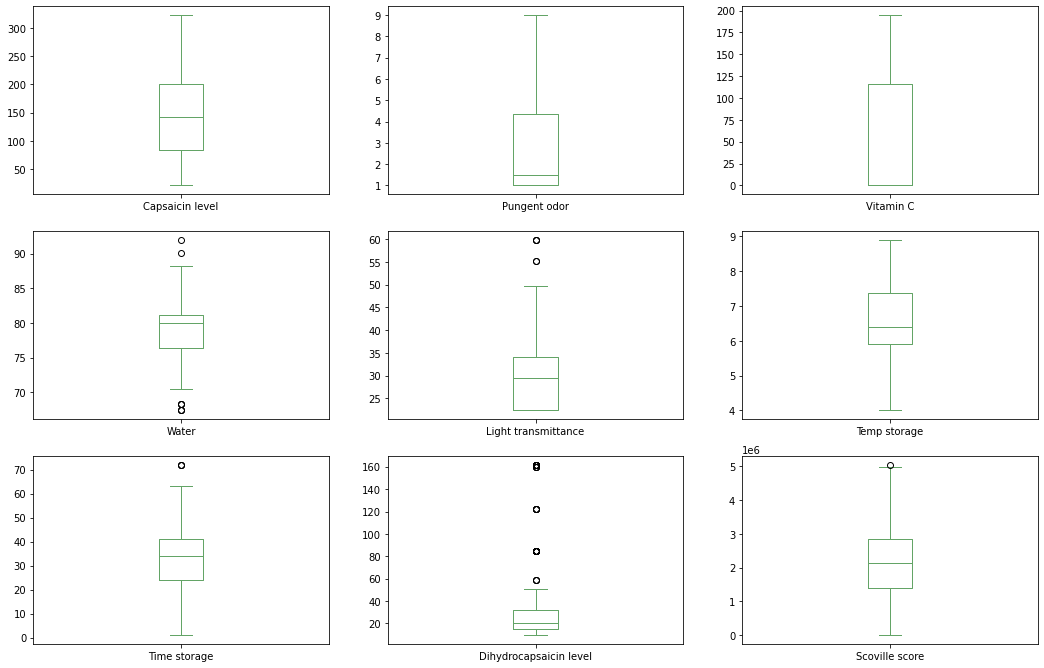

In [17]:
# Boxplots for all features
df_reduce.plot.box(subplots=True, figsize=(18,20), layout=(5, 3), sharex=False, sharey=False, color='#63a466')
plt.show()

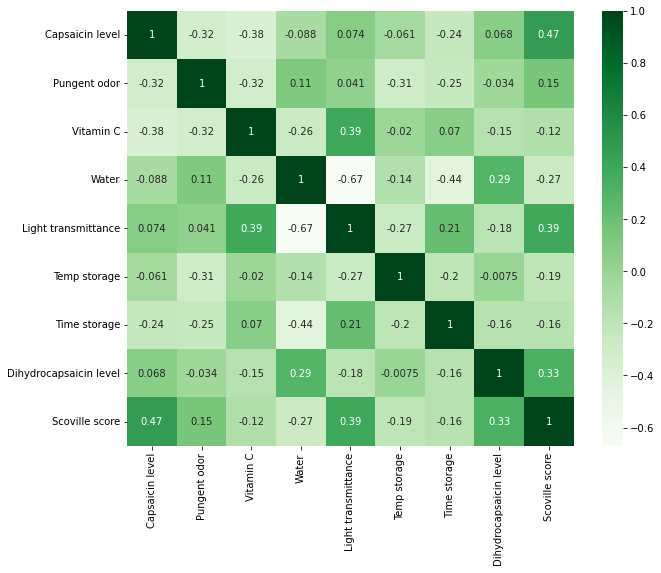

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_reduce.corr(), annot = True, annot_kws={'size':10}, cmap='Greens')
plt.show()

### Data preprocessing

In [19]:
# Selecting features
#X = df_clean.iloc[:, :-1] # data
#y = df_clean.iloc[:, -1]  # target

X = df_reduce.iloc[:, :-1] # data
y = df_reduce.iloc[:, -1]  # target

#### Train test split

In [20]:
# Splitting the data into train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Scaling

In [21]:
sc = StandardScaler()
sc.fit(X_train)

# Scale X_train and then scale X_test with parameters (mean & std) of X_train
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### Modelling

#### Data pipeline with regression model

In [37]:
# Pipeline with standard scaler and random forest regressor
pipeline_rfr = make_pipeline(StandardScaler(), RandomForestRegressor())

# Hyperparameter grid
param_grid = {
    'randomforestregressor__n_estimators': range(100, 1100, 100),
    'randomforestregressor__max_depth': [2, 3, 4, 8, 16, 25]
    #'randomforestregressor__max_features': [*np.arange(0.1, 1.2, 0.1)]
}

In [38]:
# Create a grid search object with 5-fold cross-validation
gridsearch_rfr = GridSearchCV(pipeline_rfr, 
                              param_grid=param_grid, 
                              cv=5,
                              scoring='neg_mean_absolute_error',
                              refit=True,
                              n_jobs=-1)

# Fit the model
gridsearch_rfr = gridsearch_rfr.fit(X_train, y_train)

# Printing the best score and best parameters
print(gridsearch_rfr.best_score_)
print(gridsearch_rfr.best_params_)

est = gridsearch_rfr.best_estimator_
print(f'Test accuracy:{est.score(X_test, y_test)}')

-297747.6475771213
{'randomforestregressor__max_depth': 16, 'randomforestregressor__n_estimators': 500}
Test accuracy:0.8730377979940549


##### Binning train target values

Can be performed with ex. pandas.qcut or pandas.cut

```python
n_bins = 10
y_train_binned = pd.cut(y_train, n_bins, labels=False) # or
y_train_binned = pd.qcut(y_train, n_bins, labels=False) 
```

In [49]:
# Pipeline with standard scaler and random forest classifier
pipeline_rfc = make_pipeline(StandardScaler(), RandomForestClassifier())

# Defining bins
n_bins = 200
y_train_binned = pd.cut(y_train, n_bins, labels=False)

# Hyperparameter grid
grid_rfc = {
    'randomforestclassifier__n_estimators': [50, 550, 950],
    'randomforestclassifier__max_depth': [1, 4, 8, 16, 25]
    #'randomforestclassifier__max_features': [*np.arange(0.1, 1.1, 0.1)]
}

# Create a grid search object with 3-fold cross-validation
gridsearch_rfc = GridSearchCV(pipeline_rfc, 
                              param_grid=grid_rfc, 
                              cv=3,
                              scoring='neg_mean_absolute_error',
                              refit=True,
                              n_jobs=-1)

# Fitting the model
gridsearch_rfc = gridsearch_rfc.fit(X_train, y_train_binned)

# Printing the best score and best parameters
print(gridsearch_rfc.best_score_)
print(gridsearch_rfc.best_params_)

est_rfc = gridsearch_rfc.best_estimator_
print(f'Test accuracy:{est_rfc.score(X_test, y_test)}')

-19.54398148148148
{'randomforestclassifier__max_depth': 25, 'randomforestclassifier__n_estimators': 50}
Test accuracy:0.0


#### Comment on how increasing the number of bins affects the performance of the model:
Increasing the number of bins can make the model preform better or stay the same. In the end, the result does not change at a certain point when you keep increasing the number of bins. A higher number of bins can also lead to overfitting. Generally, trial and error will lead to the optimal number of bins.

### Final Evaluation

#### Prediction with random forest regressor: 

In [51]:
final_df = gridsearch_rfr.best_estimator_.fit(X_train, y_train)
y_predict = gridsearch_rfr.best_estimator_.predict(test_reduce)
#y_predict

### Kaggle submission

In [52]:
submit = pd.DataFrame({'Id':test_df.index, 'Scoville score': y_predict})
submit.to_csv('submit_rfr.csv', index=False)